# Snapchat Political Ads
This project uses political ads data from Snapchat, a popular social media app. Interesting questions to consider include:
- What are the most prevalent organizations, advertisers, and ballot candidates in the data? Do you recognize any?
- What are the characteristics of ads with a large reach, i.e., many views? What may a campaign consider when maximizing an ad's reach?
- What are the characteristics of ads with a smaller reach, i.e., less views? Aside from funding constraints, why might a campaign want to produce an ad with a smaller but more targeted reach?
- What are the characteristics of the most expensive ads? If a campaign is limited on advertising funds, what type of ad may the campaign consider?
- What groups or regions are targeted frequently? (For example, for single-gender campaigns, are men or women targeted more frequently?) What groups or regions are targeted less frequently? Why? Does this depend on the type of campaign?
- Have the characteristics of ads changed over time (e.g. over the past year)?
- When is the most common local time of day for an ad's start date? What about the most common day of week? (Make sure to account for time zones for both questions.)

### Getting the Data
The data and its corresponding data dictionary is downloadable [here](https://www.snap.com/en-US/political-ads/). Download both the 2018 CSV and the 2019 CSV. 

The CSVs have the same filename; rename the CSVs as needed.

Note that the CSVs have the exact same columns and the exact same data dictionaries (`readme.txt`).

### Cleaning and EDA
- Concatenate the 2018 CSV and the 2019 CSV into one DataFrame so that we have data from both years.
- Clean the data.
    - Convert `StartDate` and `EndDate` into datetime. Make sure the datetimes are in the correct time zone. You can use whatever timezone (e.g. UTC) you want as long as you are consistent. However, if you want to answer a question like "When is the most common local time of day for an ad's start date," you will need to convert timezones as needed. See Hint 2 below for more information.
- Understand the data in ways relevant to your question using univariate and bivariate analysis of the data as well as aggregations.

*Hint 1: What is the "Z" at the end of each timestamp?*

*Hint 2: `pd.to_datetime` will be useful here. `Series.dt.tz_convert` will be useful if a change in time zone is needed.*

*Tip: To visualize geospatial data, consider [Folium](https://python-visualization.github.io/folium/) or another geospatial plotting library.*

### Assessment of Missingness
Many columns which have `NaN` values may not actually have missing data. How come? In some cases, a null or empty value corresponds to an actual, meaningful value. For example, `readme.txt` states the following about `Gender`:

>  Gender - Gender targeting criteria used in the Ad. If empty, then it is targeting all genders

In this scenario, an empty `Gender` value (which is read in as `NaN` in pandas) corresponds to "all genders".

- Refer to the data dictionary to determine which columns do **not** belong to the scenario above. Assess the missingness of one of these columns.

### Hypothesis Test / Permutation Test
Find a hypothesis test or permutation test to perform. You can use the questions at the top of the notebook for inspiration.

# Summary of Findings

### Introduction
Our dataset is about political ads on Snapchat, including descriptions on the date they were published, the amount of money a company invested into the ad, the number of people that viewed the ad, and more. Given Snapchat political data from 2018 and 2019, we want to visualize our data and test to see if the ad creators specifically choose a certain day to publish their ads. It is important for these creators to publish their ad on the right day in order to maximize the number of views. We measure the importance of a day in the week by the amount of money spent on the ads that were published on that given day.

### Cleaning and EDA
First, we needed to select only the columns that we needed. From all the columns, I chose: 'ADID', 'Spend', 'StartDate', 'EndDate', 'OrganizationName', 'CountryCode'. Initially, we planned on looking at which com

### Assessment of Missingness
TODO

### Hypothesis Test
TODO

# Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

### Cleaning and EDA

In [2]:
# Reading in the CSVs

pol18 = pd.read_csv('2018PoliticalAds.csv')
pol19 = pd.read_csv('2019PoliticalAds.csv')

In [3]:
# First, I check to see if all the columns match between the CSVs

pol19.columns == pol18.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [4]:
# I check to see if the concatenation of the CSVs was successful

pol_comb = pd.concat([pol18, pol19], ignore_index = True)
pol_comb.columns == pol19.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [5]:
# I chose the columns that were relevant to my question

useful_cols = ['ADID', 'Spend', 'StartDate', 'EndDate', 'OrganizationName', 'CountryCode']
pol_comb = pol_comb[useful_cols]

In [6]:
# I create a table that contains the percentage of null values in each category - everything has some value except for EndDate

s_type = pol_comb.dtypes
s_null = pol_comb.isnull().mean().sort_values(ascending = False)
type_null = pd.concat([s_type, s_null], axis = 1)
type_null.columns = ['type', 'null %']
type_null.sort_values(by = 'null %', ascending = False)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


,type,null %
EndDate,object,0.182052
ADID,object,0.000000
CountryCode,object,0.000000
OrganizationName,object,0.000000
Spend,int64,0.000000
StartDate,object,0.000000


In [7]:
# First we convert the date to DateTime Objects 

pol_comb["StartDate"] = pd.to_datetime(pol_comb["StartDate"])
pol_comb["EndDate"] = pd.to_datetime(pol_comb["EndDate"])

In [8]:
# Given the data, it is difficult to assess the origin of the political ad, which makes it difficult to indicate at what local time it was released
# For the purposes of this project, I identified the country origin of where the ads mostly come from

pol_comb['CountryCode'].value_counts(normalize = True)

united states           0.535848
united kingdom          0.122306
norway                  0.105201
canada                  0.093486
denmark                 0.024602
netherlands             0.018510
france                  0.016870
austria                 0.008669
sweden                  0.008669
australia               0.008435
kuwait                  0.008201
finland                 0.008201
switzerland             0.007263
belgium                 0.006560
ireland                 0.006092
india                   0.004217
poland                  0.003280
germany                 0.003046
south africa            0.002343
nigeria                 0.002109
united arab emirates    0.001640
argentina               0.001406
turkey                  0.000937
lithuania               0.000703
puerto rico             0.000469
chile                   0.000234
new zealand             0.000234
iraq                    0.000234
brazil                  0.000234
Name: CountryCode, dtype: float64

In [9]:
# Because the majority of ads come from the US (53.58%), I decided to focus only on the ads that originate from the US

us_pol_comb = pol_comb[pol_comb['CountryCode'] == 'united states'].reset_index().drop(columns = ['index'])

In [10]:
# Although there are still different time zones in the US, I decided to settle on Pacific Standard Time in order to standardize all the times
# As a result, ads that were published after 9pm PST could potentially be a part of the next day depending on the region, but we are forced to generalize

us_pol_comb.loc[:, "StartDate"] = us_pol_comb.loc[:, "StartDate"].dt.tz_convert('US/PACIFIC')
us_pol_comb.loc[:, "EndDate"] = us_pol_comb.loc[:, "EndDate"].dt.tz_convert('US/PACIFIC')

In [11]:
# We can extract the month, day of week, and hour of when the ads are released

us_pol_comb['StartDOW'] = us_pol_comb['StartDate'].apply(lambda x: x.weekday)
us_pol_comb['StartMonth'] = us_pol_comb['StartDate'].apply(lambda x: x.month)

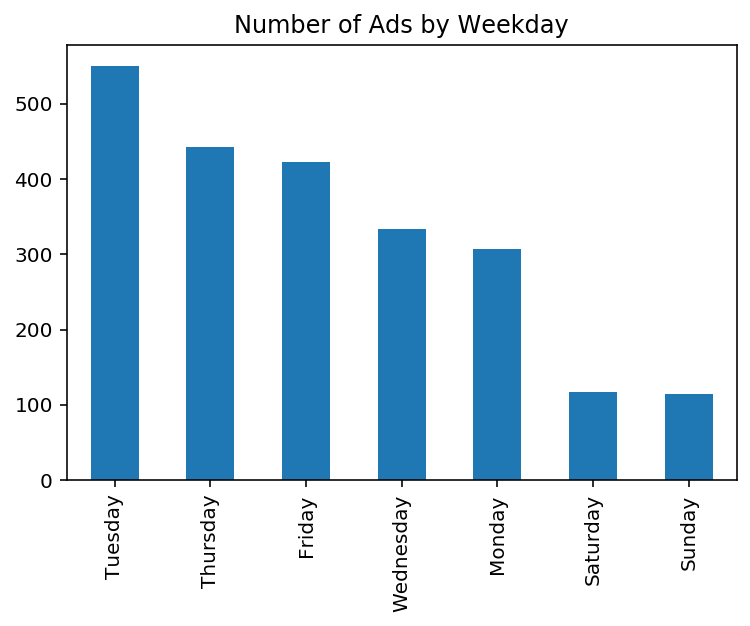

In [12]:
# Distribution of Weekdays - It is interesting to note that the ads usually are published on Tuesday/Thursdays, but not during the weekend
# This is an issue that we want to focus on

dayDict = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
us_pol_comb['StartDOW'].replace(dayDict, inplace = True)
us_pol_comb['StartDOW'].value_counts().plot(kind = 'bar', title = 'Number of Ads by Weekday')

In [13]:
# In order to focus on our question, it is important we now group the ads in weekdays or weekends

us_pol_comb['isWeekday'] = us_pol_comb['StartDOW'].apply(lambda x: True if x not in ['Saturday','Sunday'] else False)

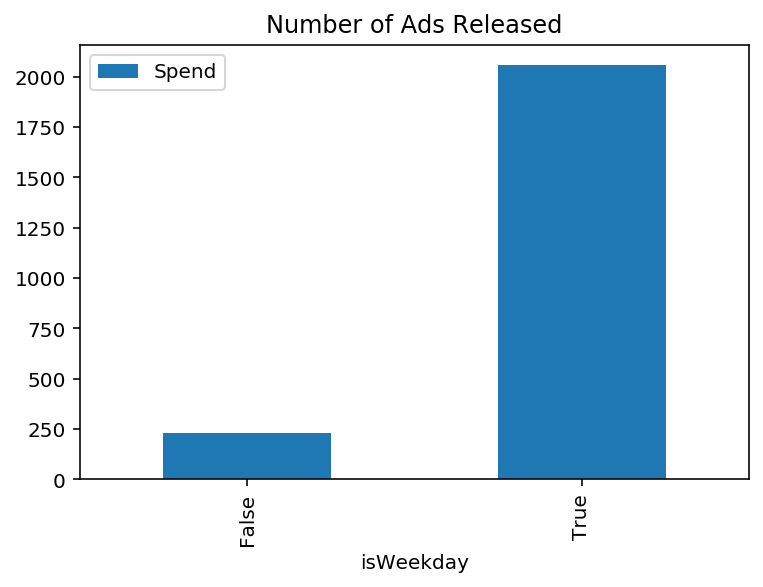

In [14]:
# We can now visualize a bar chart of the number of ads aggregated by the part of week they are released
# We observe a high number of ads released on a weekday compared to the weekend

dow = us_pol_comb[['isWeekday', 'Spend']]
dow_counts = dow.groupby('isWeekday').count()
dow_counts.plot.bar(title = 'Number of Ads Released')

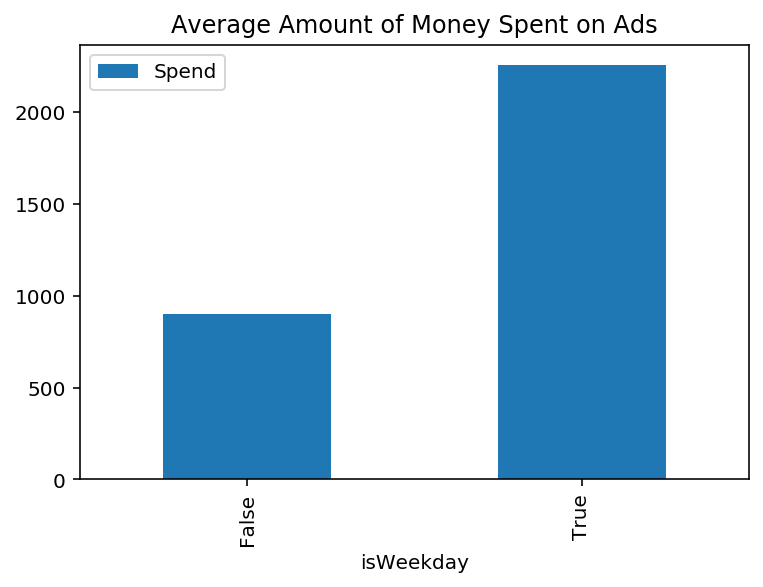

In [15]:
# Similarly, we can see that more money was spent on average on ads released on a weekday as compared to on a weekend
# However, this visualization can be biased due to outliers in the data

dow_median_spend = dow.groupby('isWeekday').mean()
dow_median_spend.plot.bar(title = 'Average Amount of Money Spent on Ads')

(-12000, 15000)

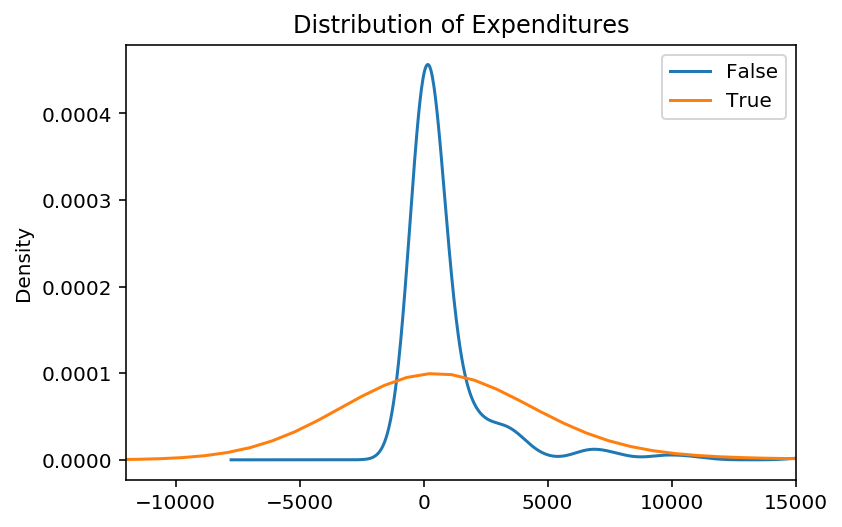

In [16]:
# We visualized the distributions of the expenditures on the weekday vs the weekend and noticed most of the data points are centered around zero
# The visualization is wide because it is being drawn out by outliers

us_pol_comb.groupby('isWeekday')['Spend'].plot(kind='kde', legend=True, title='Distribution of Expenditures')
plt.xlim(-12000, 15000)

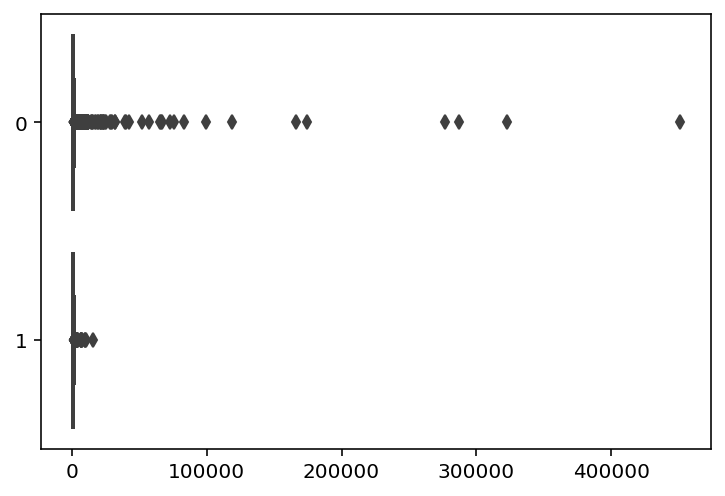

In [17]:
# To emphasize the influence of the outliers, we created a box plot to see how the data is distributed
# The box itself is squished on the far left because there are so many data points around zero and as a result, there are many outliers (especially for weekdays)

weekday = dow[dow['isWeekday'] == True]
weekend = dow[dow['isWeekday'] == False]
sns.boxplot(data=[weekday['Spend'], weekend['Spend']], orient='h')

In [18]:
us_pol_comb.shape[0]

2287

In [19]:
# To visualize our data without the outliers, we decided to calculate the z-score of all the expenditures 
# We got rid of the data points that had a z-score greater than 3, which were 16 data points (printed below were their z-scores)


no_out = us_pol_comb.copy()
z = np.abs(stats.zscore(no_out['Spend']))
print(np.where(z > 3))
no_out = no_out[z < 3]

(array([ 675,  739,  774,  910, 1252, 1292, 1355, 1396, 1416, 1430, 1441,
       1639, 1931, 1934, 1962, 2153]),)


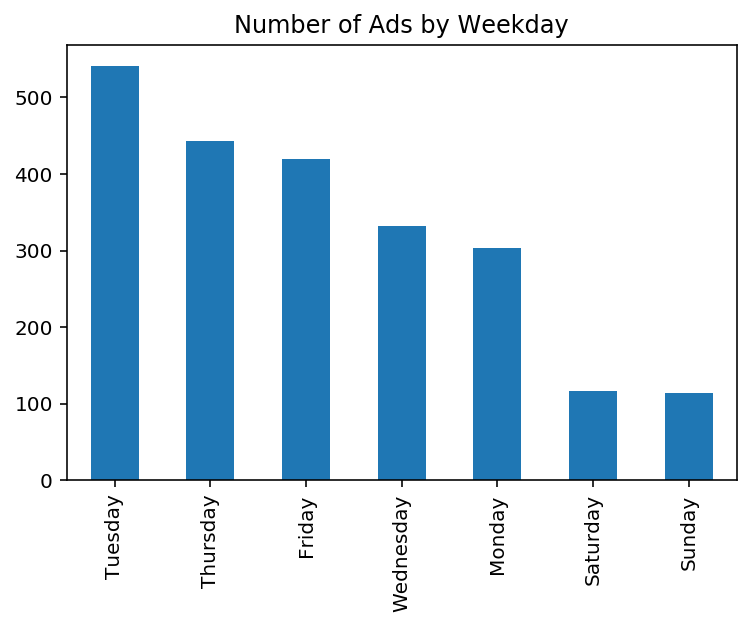

In [20]:
# Because we took out only 16 data points, we do not expect the distribution of counts to change significantly

dayDict = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
no_out['StartDOW'].replace(dayDict, inplace = True)
no_out['StartDOW'].value_counts().plot(kind = 'bar', title = 'Number of Ads by Weekday')

(-12000, 15000)

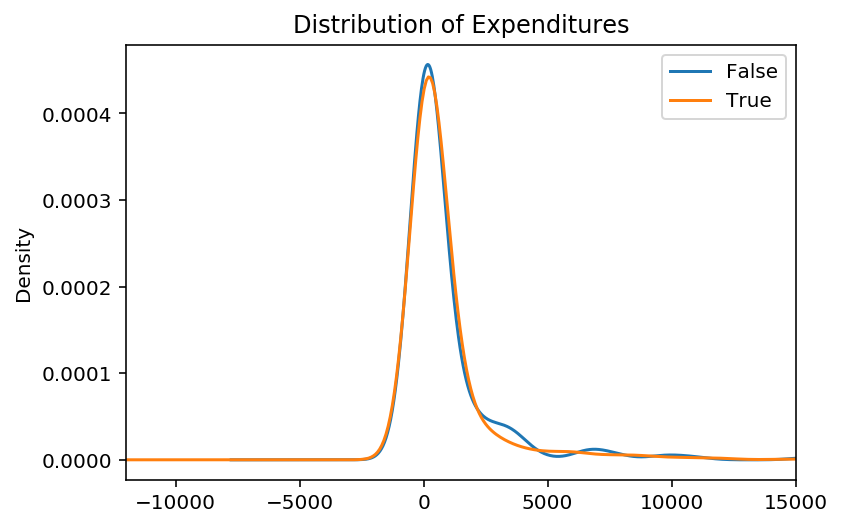

In [21]:
# The distribution around zero 

no_out.groupby('isWeekday')['Spend'].plot(kind='kde', legend=True, title='Distribution of Expenditures')
plt.xlim(-12000, 15000)

In [22]:
# Now we can go back to categorizing the ads by time of week without including the outliers

dow_no_out = no_out[['isWeekday', 'Spend']]
dow_no_out

,isWeekday,Spend
0,True,35
1,True,56
2,True,2048
3,True,196
4,True,655
...,...,...
2282,True,49
2283,True,12
2284,True,28
2285,True,2


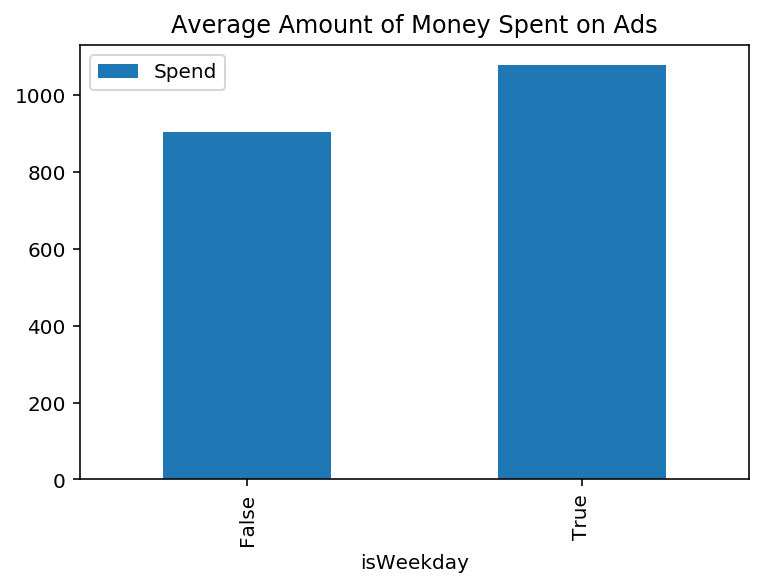

In [23]:
# By taking out the outliers, we can drastically see a change in the average amount of money spent
# This is because all the outliers were in weekdays, which means that the companies that invested heavily on their ad wanted it to be released on a weekday

dow_median_spend_no_out = dow_no_out.groupby('isWeekday').mean()
dow_median_spend_no_out.plot.bar(title = 'Average Amount of Money Spent on Ads')

In [24]:
weekday_outno = dow_no_out[dow_no_out['isWeekday'] == True]
weekend_outno = dow_no_out[dow_no_out['isWeekday'] == False]

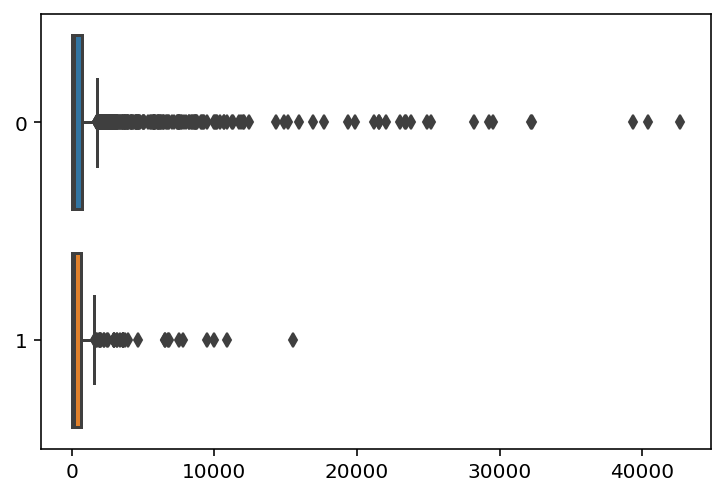

In [25]:
# Although not as visual as we would want, the data is distributed as such by the boxplots because the data is not uniformly distributed
# There are several data points that are still outliers (not as extreme) and that can be seen in the distributions

sns.boxplot(data=[weekday_outno['Spend'], weekend_outno['Spend']], orient='h')

In [26]:
# We also made a pivot table to look at the average amount of money spent on a given day on a given month
# This includes the outliers

dayDict = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
us_pol_comb['StartDOW'].replace(dayDict, inplace = True)
monthDict= {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
us_pol_comb['StartMonth'].replace(monthDict, inplace = True)

pd.pivot_table(us_pol_comb, values = 'Spend', index = 'StartDOW', columns = 'StartMonth', aggfunc = np.mean).fillna(0).round(2)

StartMonth,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
StartDOW,,,,,,,,,,,,
Friday,4772.50,150.08,4120.98,903.17,1013.00,1020.75,1654.93,2326.27,1337.20,355.03,884.53,1906.65
Monday,1714.00,1070.62,97.23,437.50,0.00,10612.23,120.25,299.50,831.83,1359.97,1538.63,1496.93
Saturday,230.00,1703.50,93.33,0.00,107.67,0.00,0.00,1712.17,77.00,294.17,4218.33,207.16
Sunday,0.00,150.67,2324.00,0.00,5357.00,0.00,976.00,352.00,298.00,315.17,775.92,350.67
Thursday,324.80,1510.17,254.27,0.00,1405.00,2133.86,270.75,416.50,753.84,387.50,840.78,429.48
Tuesday,7765.75,1712.33,3031.45,100.00,1817.00,456.45,682.77,378.00,240.60,922.37,15881.18,842.45
Wednesday,0.00,1473.00,3522.29,0.00,212.00,1090.40,254.33,836.57,121.43,1347.11,3866.51,228.48


In [27]:
# We also made a pivot table to look at the average amount of money spent on a given day on a given month
# This does not include outliers and we can see some differences like Tuesdays in April
# We want to test 

dayDict = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
no_out['StartDOW'].replace(dayDict, inplace = True)
monthDict= {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
no_out['StartMonth'].replace(monthDict, inplace = True)

pd.pivot_table(no_out, values = 'Spend', index = 'StartDOW', columns = 'StartMonth', aggfunc = np.mean).fillna(0).round(2)

StartMonth,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
StartDOW,,,,,,,,,,,,
Friday,4772.50,150.08,23.39,903.17,1013.00,1020.75,1654.93,2326.27,1337.20,355.03,884.53,1906.65
Monday,1714.00,1070.62,97.23,437.50,0.00,8192.14,120.25,299.50,831.83,1359.97,1538.63,1496.93
Saturday,230.00,1703.50,93.33,0.00,107.67,0.00,0.00,1712.17,77.00,294.17,4218.33,207.16
Sunday,0.00,150.67,2324.00,0.00,5357.00,0.00,976.00,352.00,298.00,315.17,775.92,350.67
Thursday,324.80,1510.17,254.27,0.00,1405.00,2133.86,270.75,416.50,753.84,387.50,840.78,429.48
Tuesday,2471.73,1712.33,3031.45,100.00,1817.00,456.45,682.77,378.00,240.60,922.37,1116.23,423.01
Wednesday,0.00,1473.00,3522.29,0.00,212.00,1090.40,254.33,836.57,121.43,1347.11,2158.88,228.48


### Assessment of Missingness

### Analyzing the Missingness of End Date

In [48]:
missing_table = us_pol_comb.assign(end_date_isnull=us_pol_comb['EndDate'].isnull())
missing_table.head()

,ADID,Spend,StartDate,EndDate,OrganizationName,CountryCode,StartDOW,StartMonth,isWeekday,end_date_isnull
0,6f6f6abb25d183bc3f0a2df46d18c65a18f6e1cac73416...,35,2018-11-06 10:21:20-08:00,2018-11-06 17:19:08-08:00,Research Triangle Student Advocacy,united states,Tuesday,Nov,True,False
1,64d906646b616c034c91b69b9e7851944844eb456dd203...,56,2018-09-28 16:10:14-07:00,2018-10-16 19:00:00-07:00,Chong and Koster,united states,Friday,Sep,True,False
2,45d7697e2522ccdd56b699e832792b9b659f7159e180a2...,2048,2018-09-28 12:00:00-07:00,2018-10-26 20:59:00-07:00,Güd Marketing,united states,Friday,Sep,True,False
3,46d8326f706f56296fa29f51b5127c67190807ccc08534...,196,2018-10-26 10:58:01-07:00,2018-11-06 14:59:59-08:00,Mothership Strategies,united states,Friday,Oct,True,False
4,3af2a0894b7d969aed065b1c1d0a399882df677209dfe5...,655,2018-10-01 14:08:10-07:00,NaT,Mothership Strategies,united states,Monday,Oct,True,True
...,...,...,...,...,...,...,...,...,...,...
2282,a442aabbca2ec4d066e0982f676124949d7c6e9f3b04c9...,49,2019-08-23 15:41:42-07:00,2019-08-30 20:59:59-07:00,Chong and Koster,united states,Friday,Aug,True,False
2283,9f2f31b0472cab9f1842f26775446a592624991f62a96d...,12,2019-12-13 07:18:16-08:00,2019-12-31 20:59:59-08:00,Warren for President,united states,Friday,Dec,True,False
2284,6ce46b94e418861a750422bc5492c231213bc6ab944006...,28,2019-05-08 09:00:00-07:00,2019-05-22 09:00:00-07:00,"Middle Seat Consulting, LLC",united states,Wednesday,May,True,False
2285,400029cda9002ff5bf0748dff9d4dd4931604d665af453...,2,2019-05-21 21:00:00-07:00,2019-06-14 12:59:59-07:00,Blueprint Interactive,united states,Tuesday,May,True,False


### Is missingness dependent on Spend?

In [84]:
#only need Spend and end_date_isnull columns
df = missing_table[['Spend','end_date_isnull']]
df.head()

,Spend,StartDOW
0,35,Tuesday
1,56,Friday
2,2048,Friday
3,196,Friday
4,655,Monday


In [52]:
df_means = df.groupby('end_date_isnull').mean()
df

,Spend
end_date_isnull,
False,2732.287861
True,477.178170


In [59]:
#observed abs diff in means
observed_diff_means = abs(df_means.diff().iloc[-1,0])
observed_diff_means

2255.1096904324604

In [71]:
#permutation test
N = 1000
results = []

for _ in range(N):
    #create shuffled dataframe
    s = df['end_date_isnull'].sample(frac=1, replace=False).reset_index(drop=True)
    shuffled = df.assign(shuffled_null=s)
    
    #calculate difference of means and add to results array
    shuff_means_table = shuffled.groupby('shuffled_null').mean()
    results.append(abs(shuff_means_table.diff().iloc[-1,0]))

diffs_of_means_shuff = pd.Series(results)

In [72]:
pval = (diffs_of_means_shuff>=observed_diff_means).sum()/N
pval

0.002

**Since the p-value is less than 0.05, the distribution is significantly different than if it were randomized, and the missingness of End Date is dependent on Spend**

## Is missingness dependent on StartMonth?

In [106]:
#only need StartMonth and end_date_isnull columns
df = missing_table[['StartMonth','end_date_isnull']]
df.head()

,StartMonth,end_date_isnull
0,Nov,False
1,Sep,False
2,Sep,False
3,Oct,False
4,Oct,True


In [107]:
df_means = df.groupby('StartMonth').mean()
df_means

,end_date_isnull
StartMonth,
Apr,0.214286
Aug,0.069307
Dec,0.157895
Feb,0.000000
Jan,0.100000
Jul,0.259615
Jun,0.186047
Mar,0.111111
May,0.053435


In [111]:
#observed abs diff in means
observed_tvd = sum(df_means['end_date_isnull'] - (df_means['end_date_isnull']).mean())
observed_tvd

-4.440892098500626e-16

In [115]:
#permutation test
N = 1000
results = []

for _ in range(N):
    #create shuffled dataframe
    s = df['end_date_isnull'].sample(frac=1, replace=False).reset_index(drop=True)
    shuffled = df.assign(shuffled_null=s)
    
    #calculate tvd and add to results array
    shuff_means_table = shuffled.groupby('shuffled_null').mean()
    results.append(sum(shuff_means_table['end_date_isnull'] - (shuff_means_table['end_date_isnull']).mean()))

tvds_shuff = pd.Series(results)

In [116]:
pval = (tvds_shuff>=observed_tvd).sum()/N
pval

1.0

**The p-value is greater than 0.05, and missingness of end date is NOT DEPENDENT on start month.**

### Hypothesis Test

In [29]:
#we only need StartDOW, which represents the day of week on which the ad was shown, and Spend, which is the amount
#of money spent in USD
DOW_and_spend = us_pol_comb[['StartDOW', 'Spend']]
DOW_and_spend.head()

,StartDOW,Spend
0,Tuesday,35
1,Friday,56
2,Friday,2048
3,Friday,196
4,Monday,655


In [30]:
dow.head()

,isWeekday,Spend
0,True,35
1,True,56
2,True,2048
3,True,196
4,True,655


In [31]:
#separating ads into weekend and weekday; we no longer need StartDOW
weekday = DOW_and_spend['StartDOW'].apply(lambda x: True if x not in ['Saturday','Sunday'] else False)
weekday_and_spend = DOW_and_spend.assign(Weekday = weekday).drop('StartDOW', axis = 1)
weekday_and_spend.head()

,Spend,Weekday
0,35,True
1,56,True
2,2048,True
3,196,True
4,655,True


## Permutation Test - Testing by Simulation
- **Null hypothesis**: There is no significant difference between the amount of money spent on ads shown on weekends and weekdays.
- **Alternate hypothesis**: There is a significant difference between the amount of money spent on ads shown on weekends and weekdays.
- **Test Statistic**: Absolute difference in means

set a significance level of 0.05

In [32]:
#observed means
means_table = dow.groupby('isWeekday').mean()
means_table

,Spend
isWeekday,
False,903.160173
True,2254.464494


In [33]:
#observed test statistic
observed_difference = means_table.diff().iloc[-1,0]
observed_difference

1351.304321003251

In [34]:
#simulation

N = 1000
results = []

for _ in range(N):
    #create shuffled dataframe
    s = weekday_and_spend['Weekday'].sample(frac=1, replace=False).reset_index(drop=True)
    shuffled = weekday_and_spend.assign(weekday=s)
    
    #calculate difference of means and add to results array
    shuff_means_table = shuffled.groupby('weekday').mean()
    results.append(abs(shuff_means_table.diff().iloc[-1,0]))

diffs_of_means = pd.Series(results)

In [35]:
diffs_of_means

0       597.354574
1      1129.695458
2      1406.618656
3       913.915690
4        45.424701
          ...     
995    2949.008420
996     572.593861
997    1803.250004
998      90.968619
999    1272.633028
Length: 1000, dtype: float64

In [36]:
pval = (diffs_of_means >= observed_difference).sum() / N
pval

0.176

### Conclusion

* We cannot reject the null hypothesis that there is no significant difference between the amount of money spent on ads shown on weekdays and weekends

## However
Our exploratory data analysis showed clear outliers - what would happen if these were removed?

In [37]:
z = np.abs(stats.zscore(weekday_and_spend['Spend']))
weekday_and_spend_clean = weekday_and_spend[z<3]
weekday_and_spend_clean.head()

,Spend,Weekday
0,35,True
1,56,True
2,2048,True
3,196,True
4,655,True


In [38]:
#observed means
means_table_clean = dow_no_out.groupby('isWeekday').mean()
means_table_clean

,Spend
isWeekday,
False,903.160173
True,1077.363235


In [39]:
#observed test statistic
observed_difference_clean = means_table_clean.diff().iloc[-1,0]
observed_difference_clean

174.2030621339445

In [40]:
#simulation

N = 1000
results = []

for _ in range(N):
    #create shuffled dataframe
    s = weekday_and_spend_clean['Weekday'].sample(frac=1, replace=False).reset_index(drop=True)
    shuffled = weekday_and_spend_clean.assign(weekday=s)
    
    #calculate difference of means and add to results array
    shuff_means_table = shuffled.groupby('weekday').mean()
    results.append(abs(shuff_means_table.diff().iloc[-1,0]))

diffs_of_means_clean = pd.Series(results)

In [41]:
pval = (diffs_of_means_clean >= observed_difference_clean).sum() / N
pval

0.432

## Conclusion Without Outliers
- with a p-value of less than 0.05, we reject the null hypothesis that there is no significant difference between the amount of money spent on ads shown on weekdays and weekends
- we accept the alternate hypothesis - we have found a **significant difference** between the observed distribution and one created by random chance
- the outliers have had a significant effect on the outcome of the test - the outliers themselves merit more analysis